Modelo Clasificación: Realimentado por los datos de la primera función.

In [58]:
import numpy as np
import onnx
import onnxruntime
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.pipeline import Pipeline

def export_to_onnx(model,
                   path=".",
                   model_name="modelo.onnx", 
                   encoder=None, 
                   imputer=None, 
                   scaler=None, 
                   pca=None, 
                   input_shape=(None, 10)):
    
    steps = []
    if imputer:
        steps.append(("imputer", imputer))
    if encoder:
        steps.append(("encoder", encoder))
    if scaler:
        steps.append(("scaler", scaler))
    if pca:
        steps.append(("pca", pca))
    steps.append(("model", model))

    full_pipeline = Pipeline(steps)

    # Definimos el tipo de entrada (float32, con número de features igual al input_shape[1])
    initial_type = [("input", FloatTensorType(input_shape))]

    # Convertimos a ONNX
    onnx_model = convert_sklearn(full_pipeline, initial_types=initial_type)

    # Guardamos el modelo
    with open(f"{path}/{model_name}", "wb") as f:
        f.write(onnx_model.SerializeToString())

    print(f"✅ Modelo exportado como '{model_name}'")



Polinomio

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def get_Polynomial(grad, grado=10, plot=False):
    y = np.array([float(x.strip()) for x in grad.split(",") if x.strip()])
    x = np.arange(len(y)).reshape(-1, 1)

    poly = PolynomialFeatures(degree=grado)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    if plot:
        plt.scatter(x, y, color='blue', label='Datos originales')
        plt.plot(x, y_pred, color='red', label=f'Ajuste polinomial (grado {grado})')
        plt.legend()
        plt.show()

    return model.coef_, model.intercept_

# Mostrar coeficientes del polinomio
#print("Coeficientes del polinomio:")
#print(model.coef_)
#print("Intersección:", model.intercept_)

# Graficar


In [2]:
import pandas as pd
df = pd.read_csv("../../../data/output_funcion_1_gth_4.csv")
df_sn = pd.read_csv("../../../data/output_f1_sin_normalizar.csv")

In [4]:
get_Polynomial(df["Eluyente1 Gradiente"].iloc[0])

(array([ 0.00000000e+00, -3.66974275e+02,  7.27605146e+02, -5.24991174e+02,
         1.87971075e+02, -3.84346063e+01,  4.78802844e+00, -3.70462464e-01,
         1.74012353e-02, -4.54739449e-04,  5.07479314e-06]),
 101.21204343544215)

In [5]:
for i in range(4, 12):
    get_Polynomial(df["Eluyente1 Gradiente"].iloc[0], grado=i)

Evaluar grados de polinómio

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def get_best_polynomial(grad, max_grado=9):
    y = np.array([float(x.strip()) for x in grad.split(",") if x.strip()])
    x = np.arange(len(y)).reshape(-1, 1)

    grados = range(1, max_grado + 1)
    errors = []
    r2_scores = []

    for grado in grados:
        poly = PolynomialFeatures(degree=grado)
        x_poly = poly.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        errors.append(mse)
        r2_scores.append(r2)

    # Graficar MSE y R²
    #plt.figure(figsize=(12, 5))

    #plt.subplot(1, 2, 1)
    #plt.plot(grados, errors, marker='o')
    #plt.title("MSE vs Grado del Polinomio")
    #plt.xlabel("Grado")
    #plt.ylabel("Error Cuadrático Medio")

    #plt.subplot(1, 2, 2)
    #plt.plot(grados, r2_scores, marker='o', color='green')
    #plt.title("R² vs Grado del Polinomio")
    #plt.xlabel("Grado")
    #plt.ylabel("R²")

    #plt.tight_layout()
    #plt.show()

    # Devolver grado con menor error
    best_grado = grados[np.argmin(errors)]
    #print(f"🔍 Mejor grado según MSE: {best_grado}")

    return best_grado, errors, r2_scores


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def get_top3_polynomials(grad, max_grado=15):
    y = np.array([float(x.strip()) for x in grad.split(",") if x.strip()])
    x = np.arange(len(y)).reshape(-1, 1)

    grados = range(1, max_grado + 1)
    errors = []
    r2_scores = []

    for grado in grados:
        poly = PolynomialFeatures(degree=grado)
        x_poly = poly.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        errors.append(mse)
        r2_scores.append(r2)

    # Obtener los índices de los 3 mejores grados según menor MSE
    top3_indices = np.argsort(errors)[:3]
    top3_grados = [grados[i] for i in top3_indices]
    top3_errors = [errors[i] for i in top3_indices]
    top3_r2 = [r2_scores[i] for i in top3_indices]

    return list(zip(top3_grados, top3_errors, top3_r2))


In [14]:
mejores_grados = []
for grad in df["Eluyente1 Gradiente"]:
    mejores_grados.append(get_best_polynomial(grad, 14)[0])

KeyboardInterrupt: 

In [9]:
np.mean(mejores_grados) # -> Escojo el grado 10 para todos

10.220293724966622

In [10]:
top_mejores_grados = []
for grad in df["Eluyente1 Gradiente"]:
    top_mejores_grados.append(get_top3_polynomials(grad, 10))

In [11]:
top_mejores_grados

[[(10, 364.5296487934314, 0.8220155907781506),
  (9, 485.2593691274707, 0.763068374768981),
  (8, 667.8676268680772, 0.6739084861822211)],
 [(10, 51.23642173580683, 0.8843969314596002),
  (9, 68.50211082698137, 0.8454409198611285),
  (8, 68.54010559322838, 0.8453551935083148)],
 [(10, 51.23642173580683, 0.8843969314596002),
  (9, 68.50211082698137, 0.8454409198611285),
  (8, 68.54010559322838, 0.8453551935083148)],
 [(10, 392.54807554320854, 0.7274771929624584),
  (9, 416.677364540419, 0.7107256611653905),
  (8, 432.5301012548593, 0.6997200478970844)],
 [(10, 127.10324864852578, 0.9092119652510531),
  (9, 208.6104009140665, 0.8509925707756668),
  (8, 460.8184143225158, 0.6708439897696316)],
 [(10, 49.62487456101551, 0.9642700903160688),
  (9, 104.07661810863077, 0.9250648349617858),
  (8, 279.221070584353, 0.7989608291792658)],
 [(10, 392.54807554320854, 0.7274771929624584),
  (9, 416.677364540419, 0.7107256611653905),
  (8, 432.5301012548593, 0.6997200478970844)],
 [(10, 244.120010258

In [15]:
def generar_df_grad(df):
    # Crear un diccionario para almacenar las nuevas columnas
    columns = {f"x{i}": [] for i in range(11)}  # Para almacenar los coeficientes de x^0, x^1, ..., x^10
    columns["Intercepto"] = []  # Para almacenar el intercepto
    columns["duration"] = []

    # Iterar sobre cada valor en la columna 'Eluyente1 Gradiente' del DataFrame
    for grad in df["Eluyente1 Gradiente"]:
        coeficientes, intercepto = get_Polynomial(grad, grado=10)
        # Añadir coeficientes a las columnas correspondientes
        for i, coeficiente in enumerate(coeficientes):
            columns[f"x{i}"].append(coeficiente)
        # Añadir el intercepto a la columna 'Intercepto'
        columns["Intercepto"].append(intercepto)

    for t in df["T Gradiente"]:
        valores = np.array([float(x.strip()) for x in t.split(",") if x.strip()])
        columns["duration"].append(np.max(valores))
    # Convertir el diccionario `columns` a un DataFrame
    coef_df = pd.DataFrame(columns)

    # Resetear los índices de ambos DataFrames antes de concatenarlos
    df.reset_index(drop=True, inplace=True)
    coef_df.reset_index(drop=True, inplace=True)

    # Concatenar el DataFrame original con el nuevo DataFrame de coeficientes
    df_final = pd.concat([df, coef_df], axis=1)
    return df_final

Preprocesamiento de datos

In [5]:
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0
    
    def __eq__(self, value):
        if not isinstance(value, Column):
            return False
        return (
            self.usp_code == value.usp_code and
            self.particle_size == value.particle_size and
            self.temperature == value.temperature and
            self.flowrate == value.flowrate and
            self.t0 == value.t0
        )
    
    def __hash__(self):
        return hash((
            self.usp_code,
            self.particle_size,
            self.temperature,
            self.flowrate,
            self.t0
        ))
    
    def __repr__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"
    def __str__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"


class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna:Column):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

    def __eq__(self, value):
        if not isinstance(value, Config):
            return False
        return (
            self.eluyente1 == value.eluyente1 and
            self.eluyente2 == value.eluyente2 and
            self.ph1 == value.ph1 and
            self.ph2 == value.ph2 and
            self.eluyente_1_gradiente == value.eluyente_1_gradiente and
            self.eluyente_2_gradiente == value.eluyente_2_gradiente and
            self.t_gradiente == value.t_gradiente and
            self.columna == value.columna
        )
    
    def __hash__(self):
        return hash((
            self.eluyente1, 
            self.eluyente2, 
            self.ph1, 
            self.ph2, 
            tuple(self.eluyente_1_gradiente),  
            tuple(self.eluyente_2_gradiente),  
            tuple(self.t_gradiente),           
            self.columna
        ))
        
    def __repr__(self):
        return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
    
    def __str__(self):
            return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")

In [6]:
from collections import defaultdict

configs_by_class = defaultdict(set)
classes = df['Clase'].unique()
configs_by_class = {clase: set() for clase in classes}

for i, row in df.iterrows():
    configs_by_class[row["Clase"]].add(
        Config(
            row["Eluyente1"],
            row["Eluyente2"],
            row["pH1"],
            row["pH2"],
            row["Eluyente1 Gradiente"],
            row["Eluyente2 Gradiente"],
            row["T Gradiente"], 
            Column(
                row["Columna Nombre"],
                row["USP Code"],
                row["Longitud"],
                row["Tamaño de Partícula"],
                row["Temperatura"],
                row["Flujo"],
                row["T0"]
            )
        )
    )


In [7]:
from collections import Counter

# Lista con la cantidad de configuraciones por clase
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Contar cuántas clases tienen menos de x configuraciones
conteo = {}
total_clases = len(n_configuraciones)
for limite in range(4, 100): 
    conteo[f"< {limite}"] = sum(1 for n in n_configuraciones if n < limite)

# Mostrar los resultados en formato N/TOTAL
for k, v in conteo.items():
    print(f"Clases con {k} configuraciones: {v}/{total_clases}")



Clases con < 4 configuraciones: 100/137
Clases con < 5 configuraciones: 103/137
Clases con < 6 configuraciones: 104/137
Clases con < 7 configuraciones: 107/137
Clases con < 8 configuraciones: 107/137
Clases con < 9 configuraciones: 109/137
Clases con < 10 configuraciones: 109/137
Clases con < 11 configuraciones: 109/137
Clases con < 12 configuraciones: 109/137
Clases con < 13 configuraciones: 111/137
Clases con < 14 configuraciones: 111/137
Clases con < 15 configuraciones: 111/137
Clases con < 16 configuraciones: 111/137
Clases con < 17 configuraciones: 111/137
Clases con < 18 configuraciones: 111/137
Clases con < 19 configuraciones: 112/137
Clases con < 20 configuraciones: 112/137
Clases con < 21 configuraciones: 113/137
Clases con < 22 configuraciones: 115/137
Clases con < 23 configuraciones: 116/137
Clases con < 24 configuraciones: 119/137
Clases con < 25 configuraciones: 119/137
Clases con < 26 configuraciones: 121/137
Clases con < 27 configuraciones: 121/137
Clases con < 28 config

In [8]:
# Filtrar las clases con mayor o igual a 8 configuraciones
clases_mayores_a_7 = [clase for clase, configs in configs_by_class.items() if len(configs) > 7]

print(clases_mayores_a_7)


['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Coumarins and derivatives (CHEMONTID:0000145)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Pheny

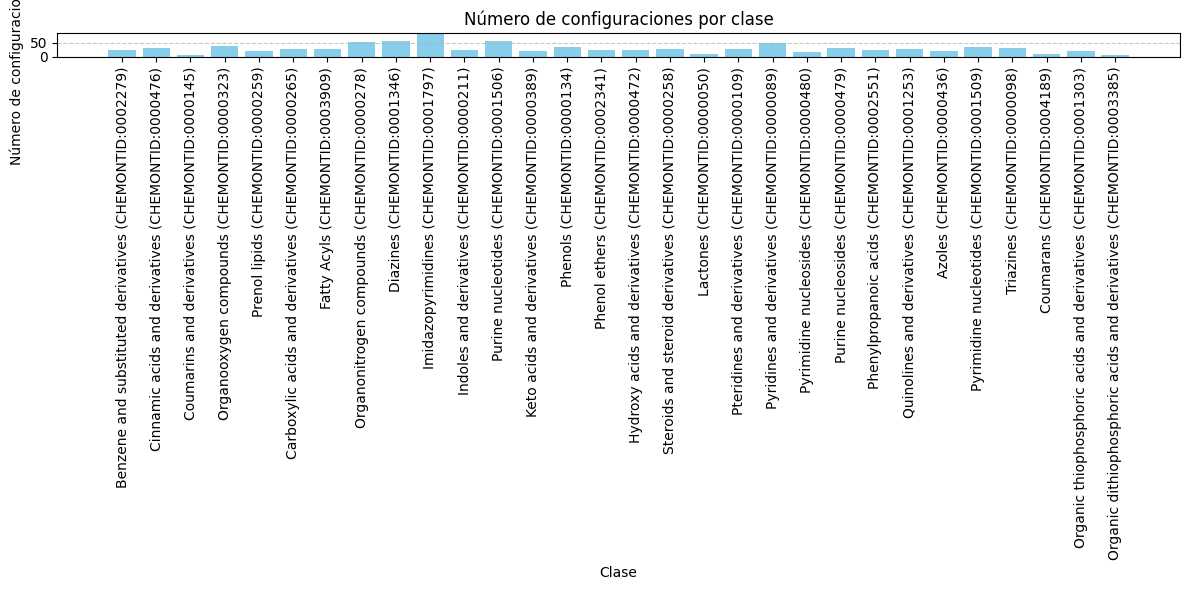

In [9]:
import matplotlib.pyplot as plt


n_configuraciones = [len(configs) for _, configs in configs_by_class.items() if len(configs) > 7]


plt.figure(figsize=(12, 6))
plt.bar(clases_mayores_a_7, n_configuraciones, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Número de configuraciones únicas")
plt.title("Número de configuraciones por clase")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [11]:
#['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinolines and derivatives (CHEMONTID:0001253)', 'Azoles (CHEMONTID:0000436)', 'Pyrimidine nucleotides (CHEMONTID:0001509)', 'Triazines (CHEMONTID:0000098)', 'Coumarans (CHEMONTID:0004189)', 'Organic thiophosphoric acids and derivatives (CHEMONTID:0001303)']
df_filtrado = df[df["Clase"].isin(clases_mayores_a_7)]
df_filtrado_sn = df_sn[df_sn["Clase"].isin(clases_mayores_a_7)]


In [16]:
df_2 = generar_df_grad(df_filtrado)
df_2_sn = generar_df_grad(df_filtrado_sn)

In [19]:
df_2["duration"]

0       23.00
1       20.10
2        8.70
3       18.00
4       10.01
        ...  
1299    10.01
1300    10.01
1301    10.01
1302    10.01
1303    10.01
Name: duration, Length: 1304, dtype: float64

In [20]:
df_2 = df_2.drop(["Eluyente1 Gradiente", "Eluyente2 Gradiente", "T Gradiente", "n_datos", "Columna Nombre", "x0"], axis=1)
df_2_sn = df_2_sn.drop(["Eluyente1 Gradiente", "Eluyente2 Gradiente", "T Gradiente", "n_datos", "Columna Nombre", "x0"], axis=1)

In [41]:
df_2.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'USP Code', 'Longitud',
       'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0', 'Score', 'x1',
       'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'Intercepto',
       'duration'],
      dtype='object')

In [45]:
df_2.to_csv("df_2.csv", index=False)

In [21]:
import re

def get_usp_code(text):
    match = re.search(r'[^.]+$', text)
    if match:
        return match.group()
    return None


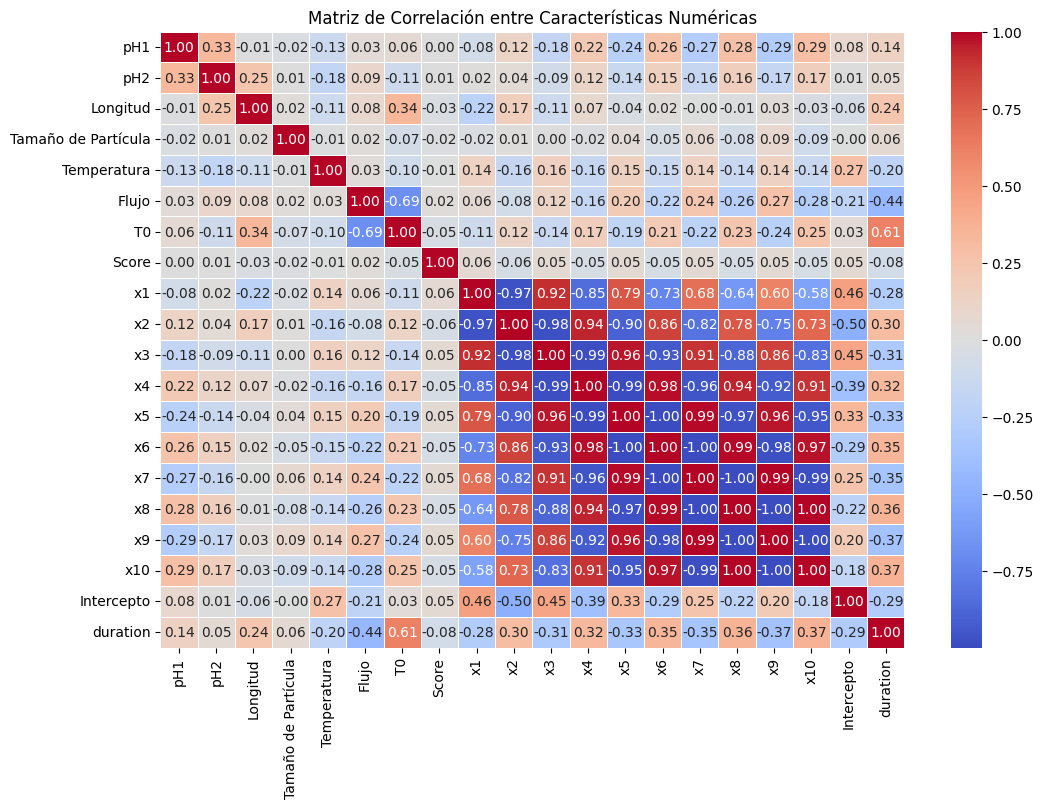

In [23]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_2_sn.select_dtypes(include=['number'])

corr_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Características Numéricas')
plt.show()

Entrenamiento del modelo 2: (Configuración, Familia) -> (Score)

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Eluyente1", "Eluyente2", "USP Code"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder = preprocess_dataframe(df_2)

# ---------- 3. Train / Test split ----------
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------- 4. Entrenamiento del modelo LightGBM ----------
#model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
#model.fit(X_train, y_train)

# ---------- 5. Evaluación del modelo ----------
#y_pred = model.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print(f"RMSE: {rmse:.4f}")


In [40]:
# ---------- 5. Modelo LightGBM ----------
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train1, y_train1)

# ---------- 6. Evaluación ----------
y_pred1 = model.predict(X_test1)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print(f"RMSE: {rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.100811
RMSE: 0.1125


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Eluyente1", "Eluyente2", "USP Code"]
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder = preprocess_dataframe(df_2)

# ---------- 3. Validación cruzada ----------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
    print(f"Fold {fold + 1}")

    X_train, X_test = X_processed.iloc[train_index], X_processed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Imputación
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Entrenamiento del modelo LightGBM
    model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
    model.fit(X_train_imputed, y_train)

    # Evaluación
    y_pred = model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"  RMSE: {rmse:.4f}")

# ---------- 4. Resultados Finales ----------
print(f"\nRMSE promedio: {np.mean(rmse_scores):.4f}")
print(f"Desviación estándar del RMSE: {np.std(rmse_scores):.4f}")


Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.100811


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSE: 0.1117
Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.103084


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSE: 0.1322
Fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.100966


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSE: 0.1212
Fold 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.100052


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSE: 0.1549
Fold 5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1044, number of used features: 22
[LightGBM] [Info] Start training from score 0.100064
  RMSE: 0.1123

RMSE promedio: 0.1264
Desviación estándar del RMSE: 0.0161


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [65]:
from onnxmltools import convert_lightgbm
from onnxmltools.convert.common.data_types import FloatTensorType
import os

def export_lgbm_to_onnx(model, path, model_name, input_shape):
    initial_types = [("input", FloatTensorType(input_shape))]

    onnx_model = convert_lightgbm(model, initial_types=initial_types)

    full_path = os.path.join(path, model_name)
    with open(full_path, "wb") as f:
        f.write(onnx_model.SerializeToString())

    print(f"Modelo LightGBM exportado exitosamente a {full_path}")


In [66]:
export_lgbm_to_onnx(model, 
                    path=r"C:\\Users\\cmora\\Desktop\\TFG\\ESTE_ES_EL_TFG\\src\\modelos\\modelo2", 
                    model_name="lgbm_model.onnx", 
                    input_shape=(None, X_processed.shape[1]))


The maximum opset needed by this model is only 8.


Modelo LightGBM exportado exitosamente a C:\\Users\\cmora\\Desktop\\TFG\\ESTE_ES_EL_TFG\\src\\modelos\\modelo2\lgbm_model.onnx


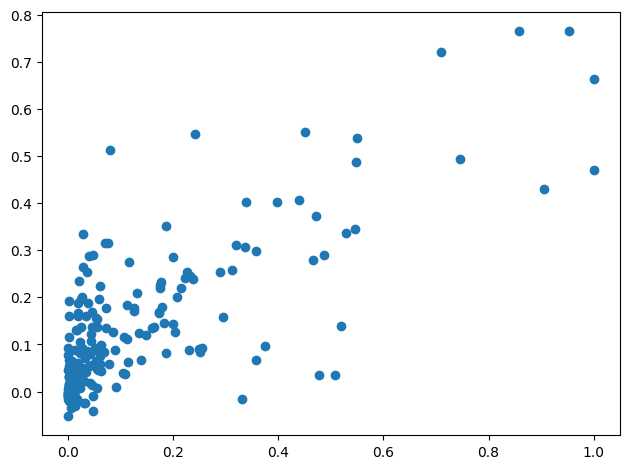

In [41]:
plt.scatter(y_test1, y_pred1)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

imputer = SimpleImputer(strategy='mean')

# Imputamos tanto X_train como X_test
X_train_imputed1 = imputer.fit_transform(X_train1)
X_test_imputed1 = imputer.transform(X_test1)

# Crear y entrenar el modelo de red neuronal
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_model.fit(X_train_imputed1, y_train1)

# Evaluación del modelo
y_pred_mlp1 = mlp_model.predict(X_test_imputed1)
rmse_mlp = np.sqrt(mean_squared_error(y_test1, y_pred_mlp1))
print(f"RMSE (MLP): {rmse_mlp:.4f}")


RMSE (MLP): 0.7974


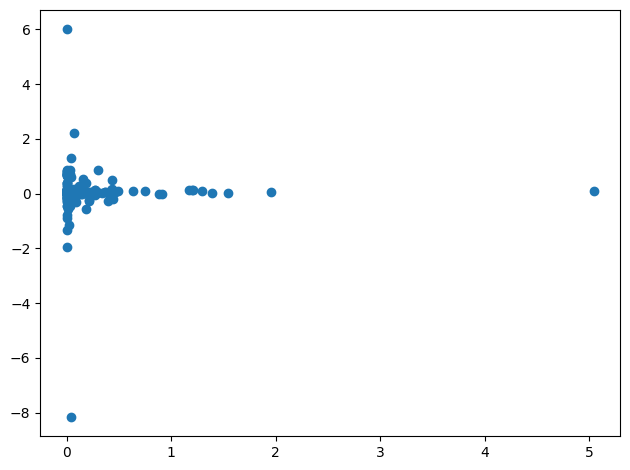

In [37]:
plt.scatter(y_test1, y_pred_mlp1)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Eluyente1", "Eluyente2", "USP Code"]
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder = preprocess_dataframe(df_2)

# ---------- 3. Validación cruzada ----------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
    print(f"Fold {fold + 1}")

    X_train, X_test = X_processed.iloc[train_index], X_processed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Imputación
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Entrenamiento del modelo
    mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
    mlp_model.fit(X_train_imputed, y_train)

    # Evaluación
    y_pred = mlp_model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"  RMSE: {rmse:.4f}")

# ---------- 4. Resultados Finales ----------
print(f"\nRMSE promedio: {np.mean(rmse_scores):.4f}")
print(f"Desviación estándar del RMSE: {np.std(rmse_scores):.4f}")


Fold 1
  RMSE: 0.6304
Fold 2
  RMSE: 0.2888
Fold 3
  RMSE: 0.5416
Fold 4
  RMSE: 0.7963
Fold 5
  RMSE: 0.3742

RMSE promedio: 0.5262
Desviación estándar del RMSE: 0.1808


In [53]:
# ---------- 8. Modelo Random Forest Regressor ----------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train1, y_train1)

# Evaluación del modelo
y_pred_rf1 = rf_model.predict(X_test1)
rmse_rf = np.sqrt(mean_squared_error(y_test1, y_pred_rf1))
print(f"RMSE (Random Forest): {rmse_rf:.4f}")

RMSE (Random Forest): 0.1130


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Eluyente1", "Eluyente2", "USP Code"]
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder = preprocess_dataframe(df_2)

# ---------- 3. Validación cruzada ----------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
    print(f"Fold {fold + 1}")

    X_train, X_test = X_processed.iloc[train_index], X_processed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Imputación (si es necesaria)
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Entrenamiento del modelo Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_imputed, y_train)

    # Evaluación
    y_pred = rf_model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"  RMSE: {rmse:.4f}")

# ---------- 4. Resultados Finales ----------
print(f"\nRMSE promedio: {np.mean(rmse_scores):.4f}")
print(f"Desviación estándar del RMSE: {np.std(rmse_scores):.4f}")


Fold 1
  RMSE: 0.1149
Fold 2
  RMSE: 0.1437
Fold 3
  RMSE: 0.1186
Fold 4
  RMSE: 0.1631
Fold 5
  RMSE: 0.1168

RMSE promedio: 0.1314
Desviación estándar del RMSE: 0.0190


In [34]:
def predecir_score(df, model, encoder):
    
    df_pred = df.drop(["Score"], axis=1)

    # Codificación categórica (orden y columnas iguales a entrenamiento)
    cat_cols = ["Clase", "Eluyente1", "Eluyente2", "USP Code"]
    df_pred[cat_cols] = encoder.transform(df_pred[cat_cols])

    prediction = model.predict(df_pred)[0]
    return prediction


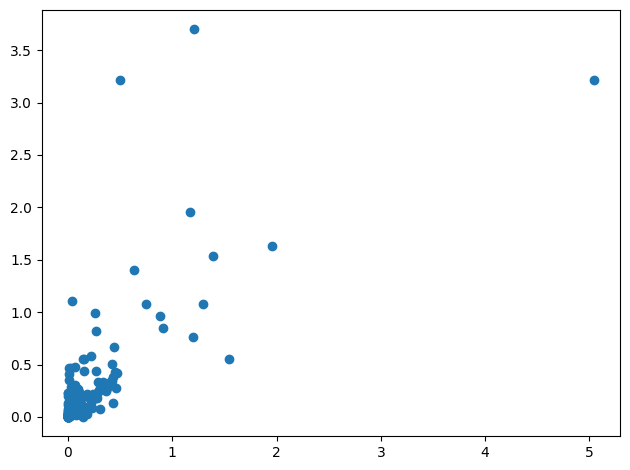

In [35]:
plt.scatter(y_test1, y_pred_rf1)
plt.tight_layout()
plt.show()

In [53]:

prediction = predecir_score(df_2.iloc[[0]], model, encoder)  # Usamos df_2.iloc[[0]] para obtener una fila
print(f"Prediction: {prediction}, real: {df_2['Score'].iloc[0]}")


Prediction: 0.5658298434613727, real: 1.0


In [54]:

prediction = predecir_score(df_2.iloc[[0]], mlp_model, encoder)  # Usamos df_2.iloc[[0]] para obtener una fila
print(f"Prediction: {prediction}, real: {df_2['Score'].iloc[0]}")


Prediction: 0.6468403523245448, real: 1.0


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [55]:

prediction = predecir_score(df_2.iloc[[0]], rf_model, encoder)  # Usamos df_2.iloc[[0]] para obtener una fila
print(f"Prediction: {prediction}, real: {df_2['Score'].iloc[0]}")

Prediction: 0.8543028096719741, real: 1.0


In [ ]:
plt.scatter(y_test, y_pred_rf)
plt.tight_layout()
plt.show()

In [62]:
df_2.iloc[0]

Clase                  Benzene and substituted derivatives (CHEMONTID...
Eluyente1                                                 eluent.1.h2o 0
Eluyente2                                                 eluent.2.acn 0
pH1                                                                  3.0
pH2                                                                  3.0
USP Code                                              column.usp.code_L1
Longitud                                                            50.0
Tamaño de Partícula                                                  1.8
Temperatura                                                         35.0
Flujo                                                                0.1
T0                                                                1.1025
Score                                                                1.0
x1                                                             95.293298
x2                                                 

Fase 3: Optimización Bayesiana (Optuna)

In [56]:
import optuna

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [67]:
for name in df_2.select_dtypes(include='number').columns:
    print(f"{name}: {df_2[name].min()}, {df_2[name].max()}")

pH1: 0.0, 11.0
pH2: 0.0, 9.0
Longitud: 50.0, 250.0
Tamaño de Partícula: 1.6, 100.0
Temperatura: 25.0, 65.0
Flujo: 0.01, 1.0
T0: 0.125, 6.666666666666667
Score: 0.0005342730629367, 1.0
x1: -644.530358761634, 548.8950978498998
x2: -1028.4261039818343, 964.5830652607651
x3: -569.2859265272588, 667.7524818594721
x4: -219.41764994725622, 187.97107453604443
x5: -38.43460625140069, 41.928550605248674
x6: -5.032615356639645, 4.788028438236571
x7: -0.3790751630315445, 0.38727616073104176
x8: -0.018206985346892912, 0.01914830400305284
x9: -0.0005329302263614721, 0.00047821243683188186
x10: -5.37855146376387e-06, 6.285897256930184e-06
Intercepto: 0.3179734533898433, 101.21204343544215
duration: 3.0, 135.0


In [69]:
# Filtrar columnas categóricas sin incluir "Clase"
categorical_cols = df_2.select_dtypes(include='object').columns.difference(['Clase'])

print("Columnas categóricas (sin 'Clase'):")
print(categorical_cols)

# Ver las categorías únicas en cada columna categórica
for col in categorical_cols:
    print(f"\nCategorías únicas en {col}:")
    print(df_2[col].unique())


Columnas categóricas (sin 'Clase'):
Index(['Eluyente1', 'Eluyente2', 'USP Code'], dtype='object')

Categorías únicas en Eluyente1:
['eluent.1.h2o 0' 'eluent.1.acn 0' nan]

Categorías únicas en Eluyente2:
['eluent.2.acn 0' 'eluent.2.meoh 0' 'eluent.2.h2o 0' nan]

Categorías únicas en USP Code:
['column.usp.code_L1' 'column.usp.code_L68' 'column.usp.code_L11'
 'column.usp.code_0' 'column.usp.code_L43' 'column.usp.code_L122'
 'column.usp.code_L114' 'column.usp.code_L7' 'column.usp.code_L3'
 'column.usp.code_L10']


In [ ]:
import optuna
import pandas as pd

# Clase fija para la optimización
CLASE_METABOLITO = "Benzene and substituted derivatives (CHEMONTID:0002279)"

def objective(trial):
    # Parámetros a optimizar
    config = {
        'Eluyente1': trial.suggest_categorical('Eluyente1', ['eluent.1.h2o 0', 'eluent.1.acn 0']),
        'Eluyente2': trial.suggest_categorical('Eluyente2', ['eluent.2.acn 0', 'eluent.2.meoh 0', 'eluent.2.h2o 0']),
        'pH1': trial.suggest_float('pH1', 0.0, 11.0),
        'pH2': trial.suggest_float('pH2', 0.0, 9.0),
        'USP Code': trial.suggest_categorical('USP Code', 
                                              ['column.usp.code_L1','column.usp.code_L68', 'column.usp.code_L11',
                                               'column.usp.code_0','column.usp.code_L43','column.usp.code_L122',
                                               'column.usp.code_L114','column.usp.code_L7', 'column.usp.code_L3',
                                               'column.usp.code_L10']),
        'Longitud': trial.suggest_float('Longitud', 50.0, 250.0),
        'Tamaño de Partícula': trial.suggest_float('Tamaño de Partícula', 1.6, 100.0),
        'Temperatura': trial.suggest_float('Temperatura', 25.0, 65.0),
        'Flujo': trial.suggest_float('Flujo', 0.01, 1.0),
        'T0': trial.suggest_float('T0', 0.125, 6.67),
        'duration': trial.suggest_float('duration', 3.0, 135.0),

        'x1': trial.suggest_float('x1', -645, 549),
        'x2': trial.suggest_float('x2', -1028, 965),
        'x3': trial.suggest_float('x3', -569, 668),
        'x4': trial.suggest_float('x4', -219, 188),
        'x5': trial.suggest_float('x5', -38.5, 42),
        'x6': trial.suggest_float('x6', -5.1, 4.8),
        'x7': trial.suggest_float('x7', -0.38, 0.39),
        'x8': trial.suggest_float('x8', -0.0183, 0.0192),
        'x9': trial.suggest_float('x9', -0.00054, 0.00048),
        'x10': trial.suggest_float('x10', -5.4e-6, 6.3e-6),
        'Intercepto': trial.suggest_float('Intercepto', 0.32, 101.21)
    }

    # Añadir clase fija y score ficticio (se elimina luego)
    config['Clase'] = CLASE_METABOLITO

    df_config = pd.DataFrame([config])

    # Codificar las columnas categóricas utilizando el encoder (asegúrate de que el encoder esté entrenado)
    categorical_cols = ['Clase','Eluyente1', 'Eluyente2', 'USP Code']
    df_config[categorical_cols] = encoder.transform(df_config[categorical_cols])

    # Asegurarse de que las columnas estén en el mismo orden que cuando se entrenó el modelo
    model_feature_names = rf_model.feature_names_in_  # Obtiene el orden de las características utilizadas en el modelo
    df_config = df_config[model_feature_names]

    score = rf_model.predict(df_config)[0]
    return score  # Maximizar el score

# Ejecutar optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

# Mostrar resultados
print("Mejor configuración encontrada:")
print(study.best_params)
print("Score estimado:", study.best_value)


[I 2025-04-18 18:09:09,613] A new study created in memory with name: no-name-e8d8b195-586c-413c-9cde-d13e54d9327b
[I 2025-04-18 18:09:09,628] Trial 0 finished with value: 0.027339908218869603 and parameters: {'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.h2o 0', 'pH1': 1.072388333310852, 'pH2': 1.2451684031791963, 'USP Code': 'column.usp.code_L114', 'Longitud': 116.00845187299183, 'Tamaño de Partícula': 56.596551108349104, 'Temperatura': 43.35254207727653, 'Flujo': 0.84003003740296, 'T0': 6.409261103355451, 'duration': 68.33418711784563, 'x1': -425.22192796531516, 'x2': 411.15554551922355, 'x3': -411.569558773617, 'x4': 179.90732247745734, 'x5': 36.14621950498383, 'x6': -2.2104774995769136, 'x7': -0.32529039526409603, 'x8': -0.011451764325219327, 'x9': -0.0003772449103318719, 'x10': -4.941137501467765e-06, 'Intercepto': 25.82080877251824}. Best is trial 0 with value: 0.027339908218869603.
[I 2025-04-18 18:09:09,637] Trial 1 finished with value: 0.03935631378126801 and parameter

Mejor configuración encontrada:
{'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.acn 0', 'pH1': 9.837222801730432, 'pH2': 4.475019670575265, 'USP Code': 'column.usp.code_L10', 'Longitud': 64.21826667296276, 'Tamaño de Partícula': 1.668110736816214, 'Temperatura': 34.01982116873367, 'Flujo': 0.031895238002521115, 'T0': 5.685622235859859, 'duration': 5.659336490921159, 'x1': -455.1406605778613, 'x2': -223.42909766435747, 'x3': -34.51159035065322, 'x4': -31.83845893720098, 'x5': 7.128374840682334, 'x6': -2.5940172741646568, 'x7': -0.05434639300446939, 'x8': -0.0043687172343087905, 'x9': 0.00012747874784964009, 'x10': 4.749622567299997e-06, 'Intercepto': 94.80131106950431}
Score estimado: 0.7725271444784612


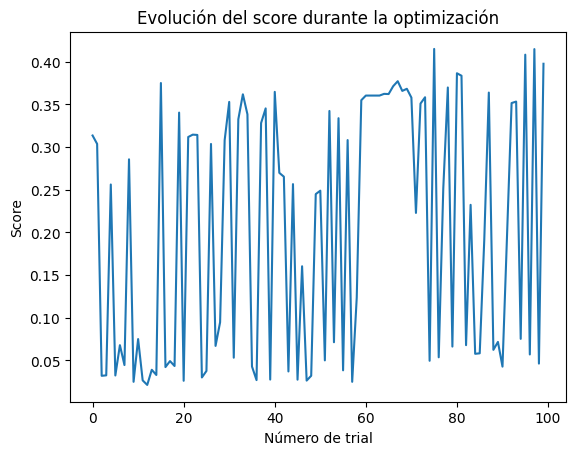

Mejor configuración: {'Eluyente1': 'eluent.1.h2o 0', 'Eluyente2': 'eluent.2.h2o 0', 'pH1': 10.880362642322405, 'pH2': 5.742955451038252, 'USP Code': 'column.usp.code_L7', 'Longitud': 50.36227271172179, 'Tamaño de Partícula': 90.36195231965337, 'Temperatura': 58.67924706921897, 'Flujo': 0.8341655610906483, 'T0': 1.7382194443103347, 'duration': 16.822736012742617, 'x1': -33.423413563345726, 'x2': 489.0742221548461, 'x3': -356.0774630436095, 'x4': -47.35286847012931, 'x5': 29.218821637766887, 'x6': -2.2275922394942786, 'x7': 0.28867554098377374, 'x8': -0.006627630448754391, 'x9': -0.000248050761291566, 'x10': -4.0239281834133605e-06, 'Intercepto': 93.39867555378551}
Score del mejor trial: 0.41490131313768525


In [81]:
import matplotlib.pyplot as plt

# Visualizar la evolución de los valores de los trials
trials = study.trials
values = [trial.value for trial in trials]
params = [trial.params for trial in trials]

# Graficar los resultados
plt.plot(values)
plt.title('Evolución del score durante la optimización')
plt.xlabel('Número de trial')
plt.ylabel('Score')
plt.show()

# Revisar los mejores parámetros
print(f"Mejor configuración: {study.best_params}")
print(f"Score del mejor trial: {study.best_value}")


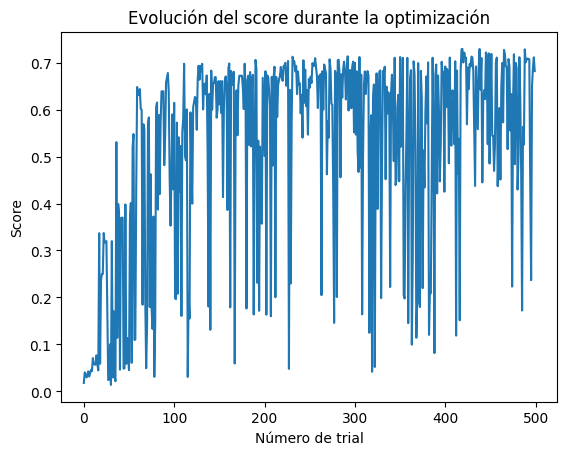

Mejor configuración: {'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.acn 0', 'pH1': 8.482656481312402, 'pH2': 3.745482226932239, 'USP Code': 'column.usp.code_L1', 'Longitud': 50.152760385112316, 'Tamaño de Partícula': 89.16738873632957, 'Temperatura': 59.14110560975871, 'Flujo': 0.0647217601785098, 'T0': 4.069793140412043, 'duration': 23.26670873758047, 'x1': 112.50188840551093, 'x2': -188.36778789468886, 'x3': 278.07621630140574, 'x4': -39.20728433893928, 'x5': -4.392807792240178, 'x6': 3.893347033224929, 'x7': 0.2279459055596544, 'x8': 0.0035615762584492176, 'x9': 0.00039325571509663443, 'x10': 3.244773678683268e-06, 'Intercepto': 98.10332342365861}
Score del mejor trial: 0.7291817480169029


In [83]:
import matplotlib.pyplot as plt

# Visualizar la evolución de los valores de los trials
trials = study.trials
values = [trial.value for trial in trials]
params = [trial.params for trial in trials]

# Graficar los resultados
plt.plot(values)
plt.title('Evolución del score durante la optimización')
plt.xlabel('Número de trial')
plt.ylabel('Score')
plt.show()

# Revisar los mejores parámetros
print(f"Mejor configuración: {study.best_params}")
print(f"Score del mejor trial: {study.best_value}")


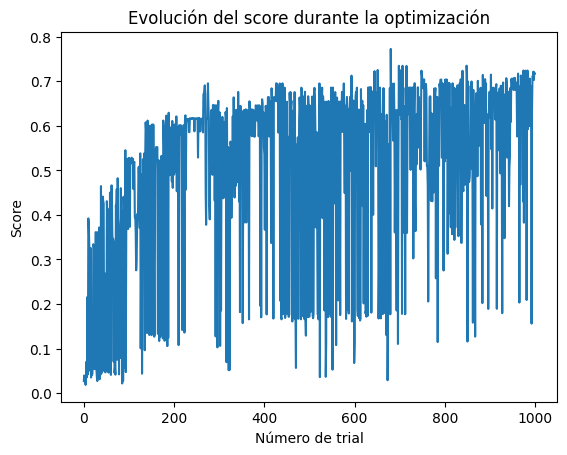

Mejor configuración: {'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.acn 0', 'pH1': 9.837222801730432, 'pH2': 4.475019670575265, 'USP Code': 'column.usp.code_L10', 'Longitud': 64.21826667296276, 'Tamaño de Partícula': 1.668110736816214, 'Temperatura': 34.01982116873367, 'Flujo': 0.031895238002521115, 'T0': 5.685622235859859, 'duration': 5.659336490921159, 'x1': -455.1406605778613, 'x2': -223.42909766435747, 'x3': -34.51159035065322, 'x4': -31.83845893720098, 'x5': 7.128374840682334, 'x6': -2.5940172741646568, 'x7': -0.05434639300446939, 'x8': -0.0043687172343087905, 'x9': 0.00012747874784964009, 'x10': 4.749622567299997e-06, 'Intercepto': 94.80131106950431}
Score del mejor trial: 0.7725271444784612


In [85]:
import matplotlib.pyplot as plt

# Visualizar la evolución de los valores de los trials
trials = study.trials
values = [trial.value for trial in trials]
params = [trial.params for trial in trials]

# Graficar los resultados
plt.plot(values)
plt.title('Evolución del score durante la optimización')
plt.xlabel('Número de trial')
plt.ylabel('Score')
plt.show()

# Revisar los mejores parámetros
print(f"Mejor configuración: {study.best_params}")
print(f"Score del mejor trial: {study.best_value}")


In [50]:
import optuna
import pandas as pd
import numpy as np
import onnxruntime as ort
import joblib

# ---------- 1. Carga de modelo y preprocesadores ----------
# Asegúrate de que estos archivos existan en tu carpeta
session = ort.InferenceSession("modelo2.0/modelo.onnx")  # archivo del modelo exportado
encoder = joblib.load("modelo2.0/encoder.pkl")           # OrdinalEncoder
imputer = joblib.load("modelo2.0/imputer.pkl")           # SimpleImputer
scaler = joblib.load("modelo2.0/scaler.pkl")             # StandardScaler

# ---------- 2. Clase fija para la optimización ----------
CLASE_METABOLITO = "Benzene and substituted derivatives (CHEMONTID:0002279)"

# ---------- 3. Función de optimización ----------
def objective(trial):
    # Parámetros a optimizar
    config = {
        'Eluyente1': trial.suggest_categorical('Eluyente1', ['eluent.1.h2o 0', 'eluent.1.acn 0']),
        'Eluyente2': trial.suggest_categorical('Eluyente2', ['eluent.2.acn 0', 'eluent.2.meoh 0', 'eluent.2.h2o 0']),
        'pH1': trial.suggest_float('pH1', 0.0, 11.0),
        'pH2': trial.suggest_float('pH2', 0.0, 9.0),
        'USP Code': trial.suggest_categorical('USP Code', [
            'column.usp.code_L1','column.usp.code_L68', 'column.usp.code_L11',
            'column.usp.code_0','column.usp.code_L43','column.usp.code_L122',
            'column.usp.code_L114','column.usp.code_L7', 'column.usp.code_L3',
            'column.usp.code_L10'
        ]),
        'Longitud': trial.suggest_float('Longitud', 50.0, 250.0),
        'Tamaño de Partícula': trial.suggest_float('Tamaño de Partícula', 1.6, 100.0),
        'Temperatura': trial.suggest_float('Temperatura', 25.0, 65.0),
        'Flujo': trial.suggest_float('Flujo', 0.01, 1.0),
        'T0': trial.suggest_float('T0', 0.125, 6.67),
        'duration': trial.suggest_float('duration', 3.0, 135.0),

        'x1': trial.suggest_float('x1', -645, 549),
        'x2': trial.suggest_float('x2', -1028, 965),
        'x3': trial.suggest_float('x3', -569, 668),
        'x4': trial.suggest_float('x4', -219, 188),
        'x5': trial.suggest_float('x5', -38.5, 42),
        'x6': trial.suggest_float('x6', -5.1, 4.8),
        'x7': trial.suggest_float('x7', -0.38, 0.39),
        'x8': trial.suggest_float('x8', -0.0183, 0.0192),
        'x9': trial.suggest_float('x9', -0.00054, 0.00048),
        'x10': trial.suggest_float('x10', -5.4e-6, 6.3e-6),
        'Intercepto': trial.suggest_float('Intercepto', 0.32, 101.21),

        'Clase': CLASE_METABOLITO
    }

    # Convertir en DataFrame
    df_config = pd.DataFrame([config])

    # Codificar categóricas
    cat_cols = ['Clase', 'Eluyente1', 'Eluyente2', 'USP Code']
    df_config[cat_cols] = encoder.transform(df_config[cat_cols])

    # Asegurarse de que las columnas estén en el mismo orden que cuando se entrenó el modelo
    df_config = df_config[imputer.feature_names_in_]

    # Imputar valores faltantes
    df_imputed = imputer.transform(df_config)

    # Escalar
    df_scaled = scaler.transform(df_imputed)
    x_input = df_scaled.astype(np.float32)

    # Inferencia ONNX
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    pred = session.run([output_name], {input_name: x_input})[0]

    return pred[0][0]  # Retornar score

# ---------- 4. Ejecutar la optimización ----------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

# ---------- 5. Resultados ----------
print("✅ Mejor configuración encontrada:")
print(study.best_params)
print("🎯 Score estimado:", study.best_value)


[I 2025-04-19 19:43:48,950] A new study created in memory with name: no-name-cdcc41d2-f93c-4b0e-a0d4-5ca3171f063b
[I 2025-04-19 19:43:48,968] Trial 0 finished with value: -0.002881571650505066 and parameters: {'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.meoh 0', 'pH1': 3.264799021445475, 'pH2': 8.723592402034445, 'USP Code': 'column.usp.code_L68', 'Longitud': 203.80408636745224, 'Tamaño de Partícula': 98.29635893653716, 'Temperatura': 30.573442993825154, 'Flujo': 0.08393746713434858, 'T0': 1.8763339289580931, 'duration': 41.31535248762855, 'x1': -375.004137710694, 'x2': 221.4265021000142, 'x3': -65.01454617957415, 'x4': -137.14510257352237, 'x5': -20.020359573966804, 'x6': -1.2946286468932149, 'x7': 0.08597084684435918, 'x8': 0.0037271075238952504, 'x9': 0.0004663153509978311, 'x10': -2.702426528968921e-06, 'Intercepto': 24.569195419761684}. Best is trial 0 with value: -0.002881571650505066.
[I 2025-04-19 19:43:48,977] Trial 1 finished with value: 0.012407205998897552 and par

✅ Mejor configuración encontrada:
{'Eluyente1': 'eluent.1.acn 0', 'Eluyente2': 'eluent.2.h2o 0', 'pH1': 10.738896547346236, 'pH2': 0.9010791612238421, 'USP Code': 'column.usp.code_0', 'Longitud': 66.02375530181662, 'Tamaño de Partícula': 1.6987980236253648, 'Temperatura': 27.182668355999038, 'Flujo': 0.9261429319011978, 'T0': 0.2687776196438687, 'duration': 17.92002896446108, 'x1': -554.3420623584972, 'x2': 671.5830042972461, 'x3': -500.2265520666211, 'x4': -203.4373814148136, 'x5': -31.576877163516873, 'x6': -0.133397362658161, 'x7': -0.19756486419875735, 'x8': 0.013323340664653863, 'x9': -8.803385524399681e-05, 'x10': -4.160323196959111e-06, 'Intercepto': 97.38592298372544}
🎯 Score estimado: 0.4446745812892914
